In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
data.shape

(213, 11)

In [4]:
column_names = ["Id_number", "refractive_index", "Na_Sodium", "Magnesium", "Aluminum", "Silicon", 
                "K_Potassium", "Calcium", "Barium", "Fe_Iron", "Type_of_glass"]

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", 
                   names=column_names)
data.head()


,Id_number,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.shape

(214, 11)

In [6]:
data.dtypes

Id_number             int64
refractive_index    float64
Na_Sodium           float64
Magnesium           float64
Aluminum            float64
Silicon             float64
K_Potassium         float64
Calcium             float64
Barium              float64
Fe_Iron             float64
Type_of_glass         int64
dtype: object

In [7]:
data.isna().sum()

Id_number           0
refractive_index    0
Na_Sodium           0
Magnesium           0
Aluminum            0
Silicon             0
K_Potassium         0
Calcium             0
Barium              0
Fe_Iron             0
Type_of_glass       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_number         214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Na_Sodium         214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   K_Potassium       214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Fe_Iron           214 non-null    float64
 10  Type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


#### There is no null values present. 
#### Data type is float64 in all columns except Type of glass and Id_number, these contain int64

In [90]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column, "Unique Value Count:", unique_count)

Column: Id_number Unique Value Count: 214
Column: refractive_index Unique Value Count: 178
Column: Na_Sodium Unique Value Count: 142
Column: Magnesium Unique Value Count: 94
Column: Aluminum Unique Value Count: 118
Column: Silicon Unique Value Count: 133
Column: K_Potassium Unique Value Count: 65
Column: Calcium Unique Value Count: 143
Column: Barium Unique Value Count: 34
Column: Fe_Iron Unique Value Count: 32
Column: Type_of_glass Unique Value Count: 6


#### There is only one categorical column(Type_of_glass )

In [9]:
data['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

#### There is multiclass classification problem.

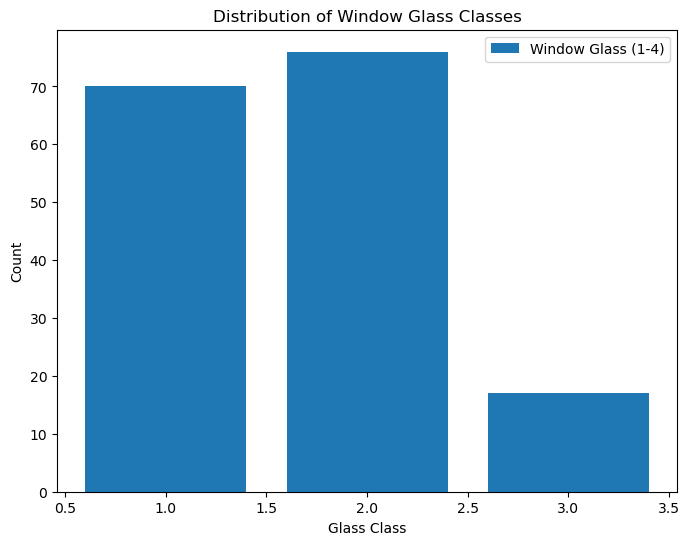

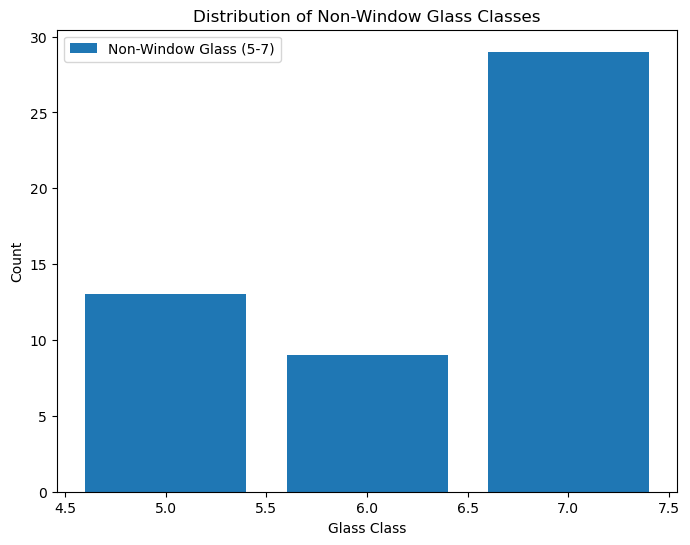

In [10]:
# Group the data into two categories: window glass (1-4) and non-window glass (5-7)
window_glass = data[data['Type_of_glass'].isin([1, 2, 3, 4])]
non_window_glass = data[data['Type_of_glass'].isin([5, 6, 7])]


window_glass_counts = window_glass['Type_of_glass'].value_counts()
non_window_glass_counts = non_window_glass['Type_of_glass'].value_counts()

# window glass
plt.figure(figsize=(8, 6))
plt.bar(window_glass_counts.index, window_glass_counts, label='Window Glass (1-4)')
plt.xlabel('Glass Class')
plt.ylabel('Count')
plt.title('Distribution of Window Glass Classes')
plt.legend()
plt.show()

# non-window glass
plt.figure(figsize=(8, 6))
plt.bar(non_window_glass_counts.index, non_window_glass_counts, label='Non-Window Glass (5-7)')
plt.xlabel('Glass Class')
plt.ylabel('Count')
plt.title('Distribution of Non-Window Glass Classes')
plt.legend()
plt.show()


#### window glass is more than non window glass 

In [11]:
data.describe()

,Id_number,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
data.skew()

Id_number           0.000000
refractive_index    1.625431
Na_Sodium           0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
K_Potassium         6.551648
Calcium             2.047054
Barium              3.416425
Fe_Iron             1.754327
Type_of_glass       1.114915
dtype: float64

#### There is lot of skewness present. Every columns have skewness except Na_Sodium and Id_number column is not required in our project so i would removed it.

In [13]:
data.drop(columns=['Id_number'], inplace = True)

In [14]:
data.head()

,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


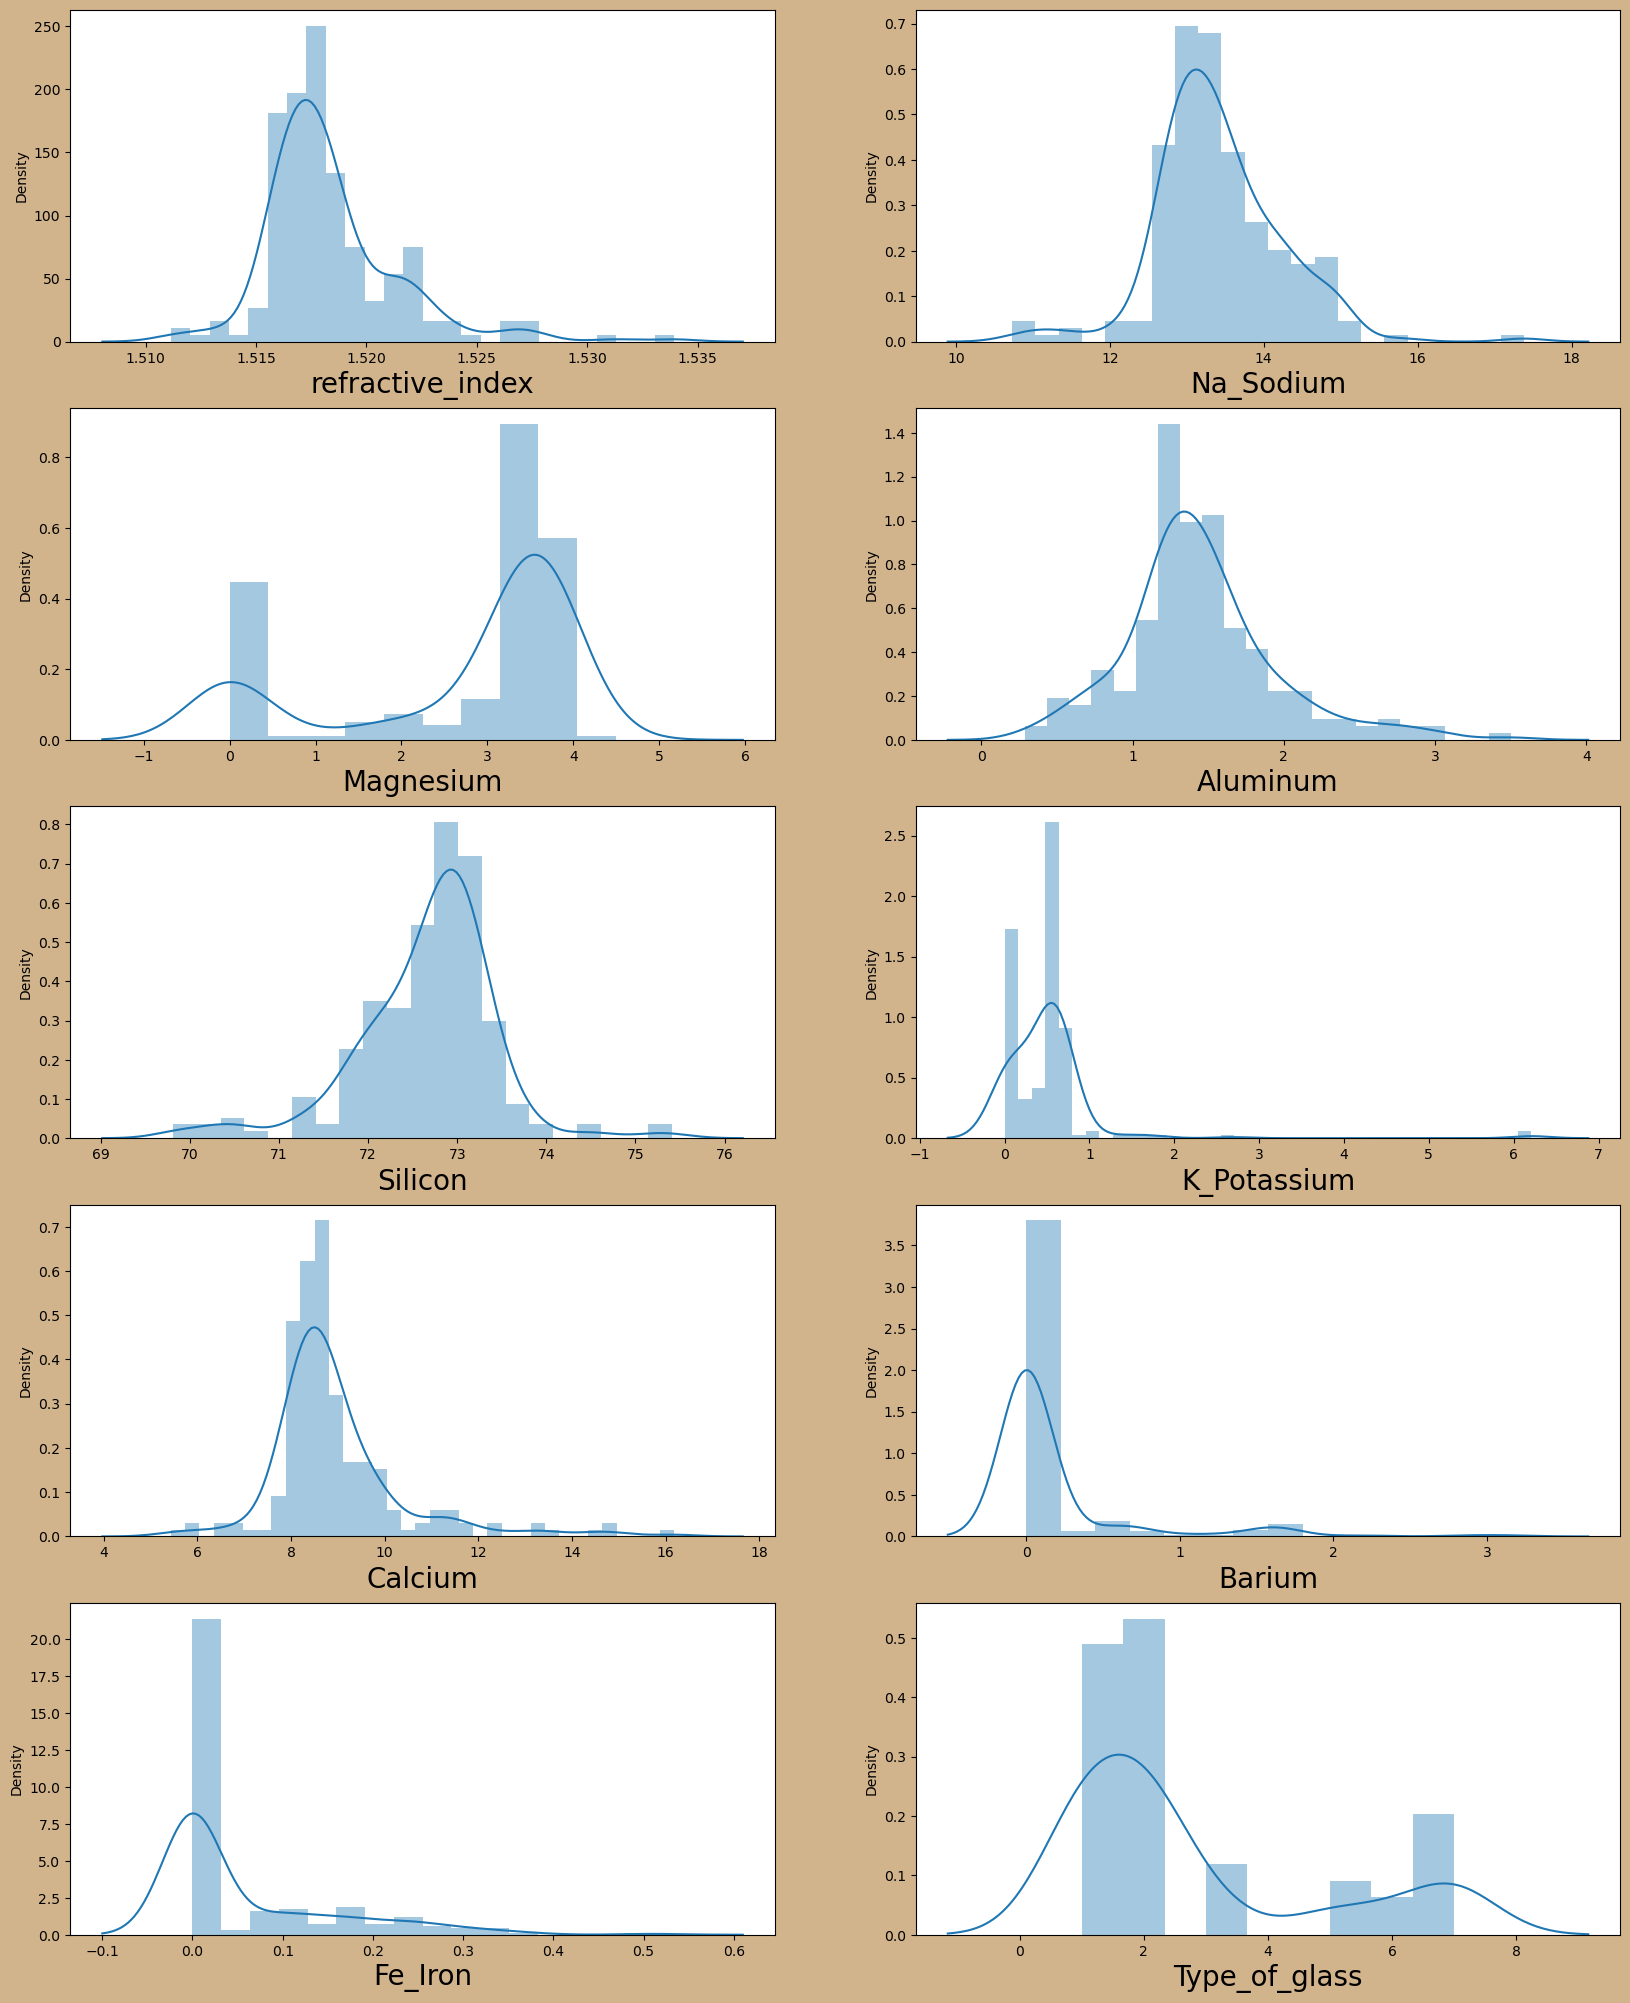

In [15]:
plt.figure(figsize=(20,25), facecolor='tan') 
plotnumber= 1

for column in data:
    if plotnumber<=10:        
        ax = plt.subplot(5,2,plotnumber) 
        sns.distplot(data[column]) 
        plt.xlabel(column, fontsize=20)



    plotnumber+=1
plt.show()

#### There is also lot of outlier

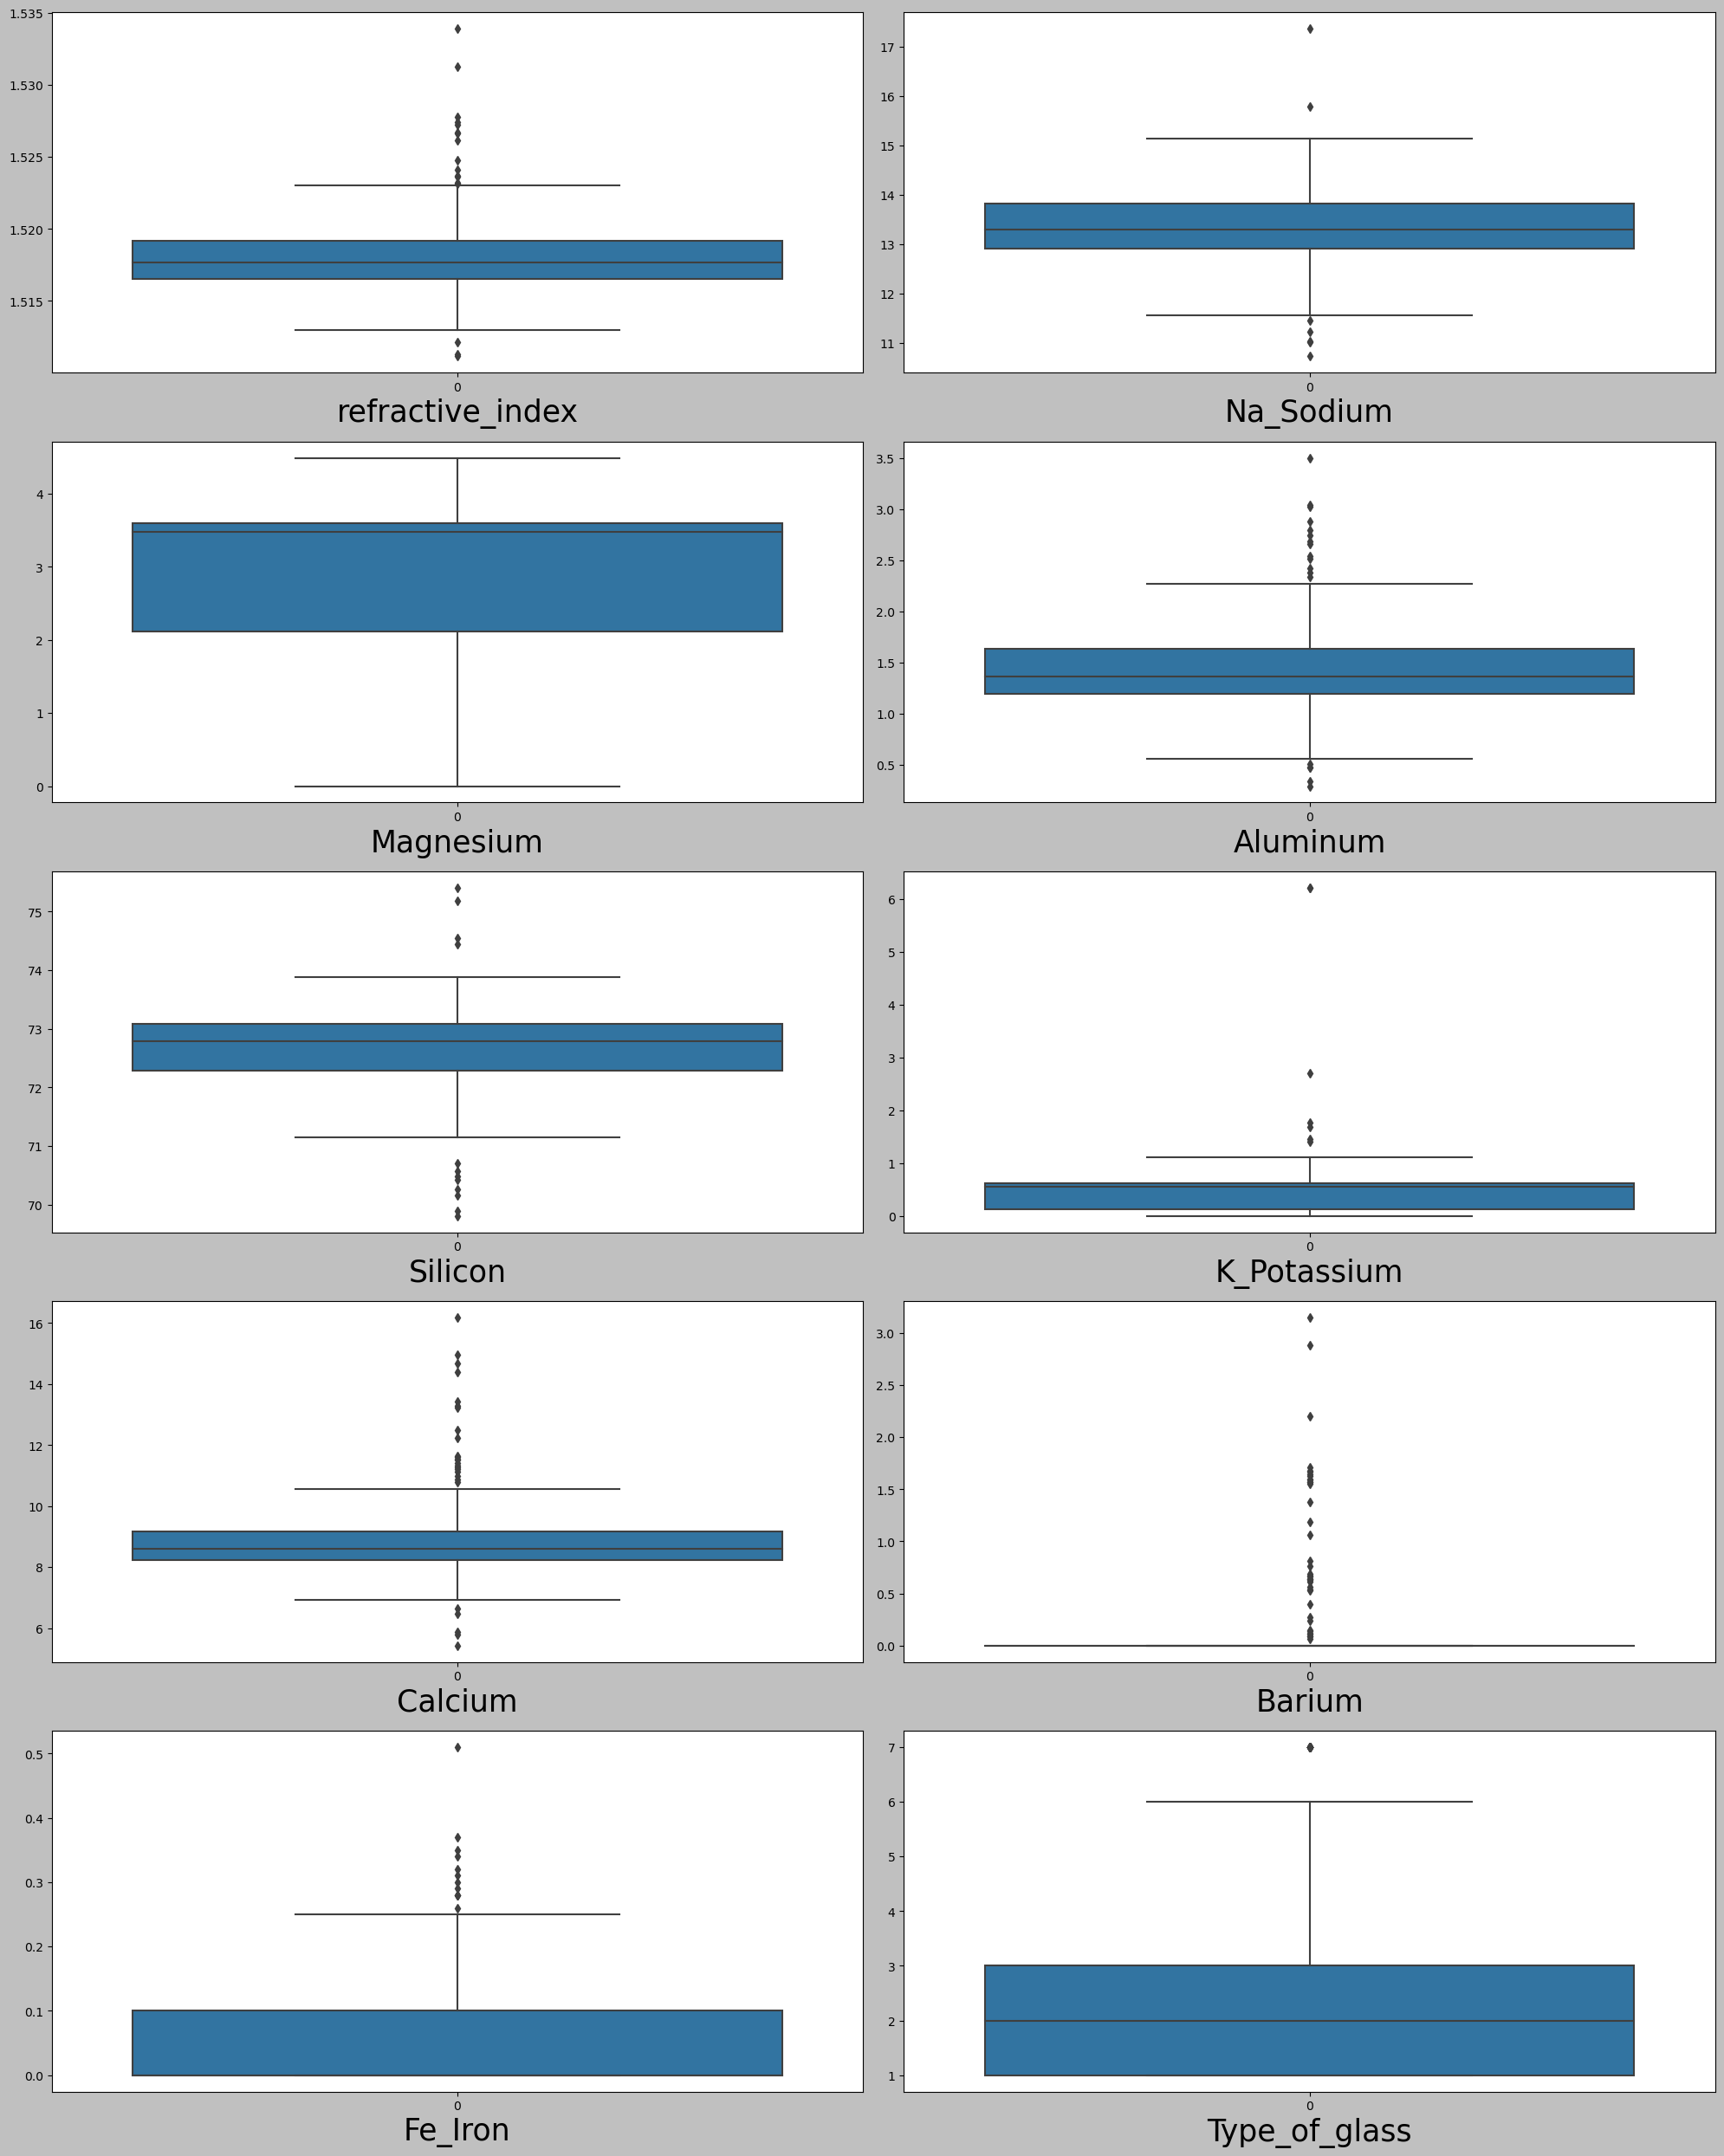

In [16]:
plt.figure(figsize=(20, 25),facecolor='silver')
graph = 1
for column in data.columns:
    if graph <= 10:
        plt.subplot(5, 2, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=25)
    graph += 1


plt.tight_layout()
plt.show()


#### There is lot of outliers present in all the columns except magnesium and type of glass is label

In [17]:
data_copy = data.copy(deep=True)

In [18]:
#Find the IQR to identify outliers

# 1st quantile
q1 = data_copy.quantile(0.25)

#3rd quantile 
q3 = data_copy.quantile(0.75)

#IQR
iqr = q3 - q1

### Removed higher side outliers

In [19]:
ri_high = (q3['refractive_index'] + (1.5* iqr['refractive_index']))
print(ri_high)

ri_index= np.where(data_copy['refractive_index']> ri_high) 
print (ri_index)

data_copy = data_copy.drop(data_copy.index[ri_index])
print (data_copy.shape ) 

data_copy.reset_index()

1.52311
(array([ 47,  50, 103, 104, 105, 106, 107, 110, 111, 112, 131, 170, 187,
       189], dtype=int64),)
(200, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
196,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
197,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
198,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [20]:
na_high = (q3['Na_Sodium'] + (1.5* iqr['Na_Sodium']))
print(na_high)

na_index= np.where(data_copy['Na_Sodium']> na_high) 
print (na_index)

data_copy = data_copy.drop(data_copy.index[na_index])
print (data_copy.shape ) 

data_copy.reset_index()

15.201249999999998
(array([172], dtype=int64),)
(199, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
194,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
195,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
196,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
197,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
a_high = (q3['Aluminum'] + (1.5* iqr['Aluminum']))
print(a_high)

a_index= np.where(data_copy['Aluminum']> a_high) 
print (a_index)

data_copy = data_copy.drop(data_copy.index[a_index])
print (data_copy.shape ) 

data_copy.reset_index()

2.29
(array([152, 159, 160, 176, 177, 180, 181, 182, 183, 184, 187, 193, 194],
      dtype=int64),)
(186, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
181,207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
182,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
183,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
184,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [22]:
s_high = (q3['Silicon'] + (1.5* iqr['Silicon']))
print(s_high)

s_index= np.where(data_copy['Silicon']> s_high) 
print (s_index)

data_copy = data_copy.drop(data_copy.index[s_index])
print (data_copy.shape ) 

data_copy.reset_index()

74.29875000000001
(array([102, 165, 176], dtype=int64),)
(183, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
178,207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
179,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
180,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
181,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [23]:
k_high = (q3['K_Potassium'] + (1.5* iqr['K_Potassium']))
print(k_high)

k_index= np.where(data_copy['K_Potassium']> k_high) 
print (k_index)

data_copy = data_copy.drop(data_copy.index[k_index])
print (data_copy.shape ) 

data_copy.reset_index()

1.34125
(array([167, 168, 178], dtype=int64),)
(180, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
175,206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
176,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
177,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
178,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [24]:
cal_high = (q3['Calcium'] + (1.5* iqr['Calcium']))
print(cal_high)

cal_index= np.where(data_copy['Calcium']> cal_high) 
print (cal_index)

data_copy = data_copy.drop(data_copy.index[cal_index])
print (data_copy.shape ) 

data_copy.reset_index()

10.57125
(array([101, 119, 152, 153, 154, 156, 157, 159, 165, 166], dtype=int64),)
(170, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
165,206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
166,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
167,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
168,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [25]:
b_high = (q3['Barium'] + (1.5* iqr['Barium']))
print(b_high)

b_index= np.where(data_copy['Barium']> b_high) 
print (b_index)

data_copy = data_copy.drop(data_copy.index[b_index])
print (data_copy.shape ) 

data_copy.reset_index()

0.0
(array([ 32,  36,  59,  97,  98, 116, 127, 128, 147, 151, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169], dtype=int64),)
(148, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
143,177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
144,178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
145,179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
146,181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


#### refractive_index,  Na_Sodium,  Aluminum, Silicon,  K_Potassium,   Calcium,  Barium,  Fe_Iron

In [26]:
fe_high = (q3['Fe_Iron'] + (1.5* iqr['Fe_Iron']))
print(fe_high)

fe_index= np.where(data_copy['Fe_Iron']> fe_high) 
print (fe_index)

data_copy = data_copy.drop(data_copy.index[fe_index])
print (data_copy.shape ) 

data_copy.reset_index()

0.25
(array([  5,  42,  52,  66, 101, 115, 123, 139], dtype=int64),)
(140, 10)


,index,refractive_index,Na_Sodium,Magnesium,Aluminum,Silicon,K_Potassium,Calcium,Barium,Fe_Iron,Type_of_glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
135,177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
136,178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
137,179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6
138,181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6


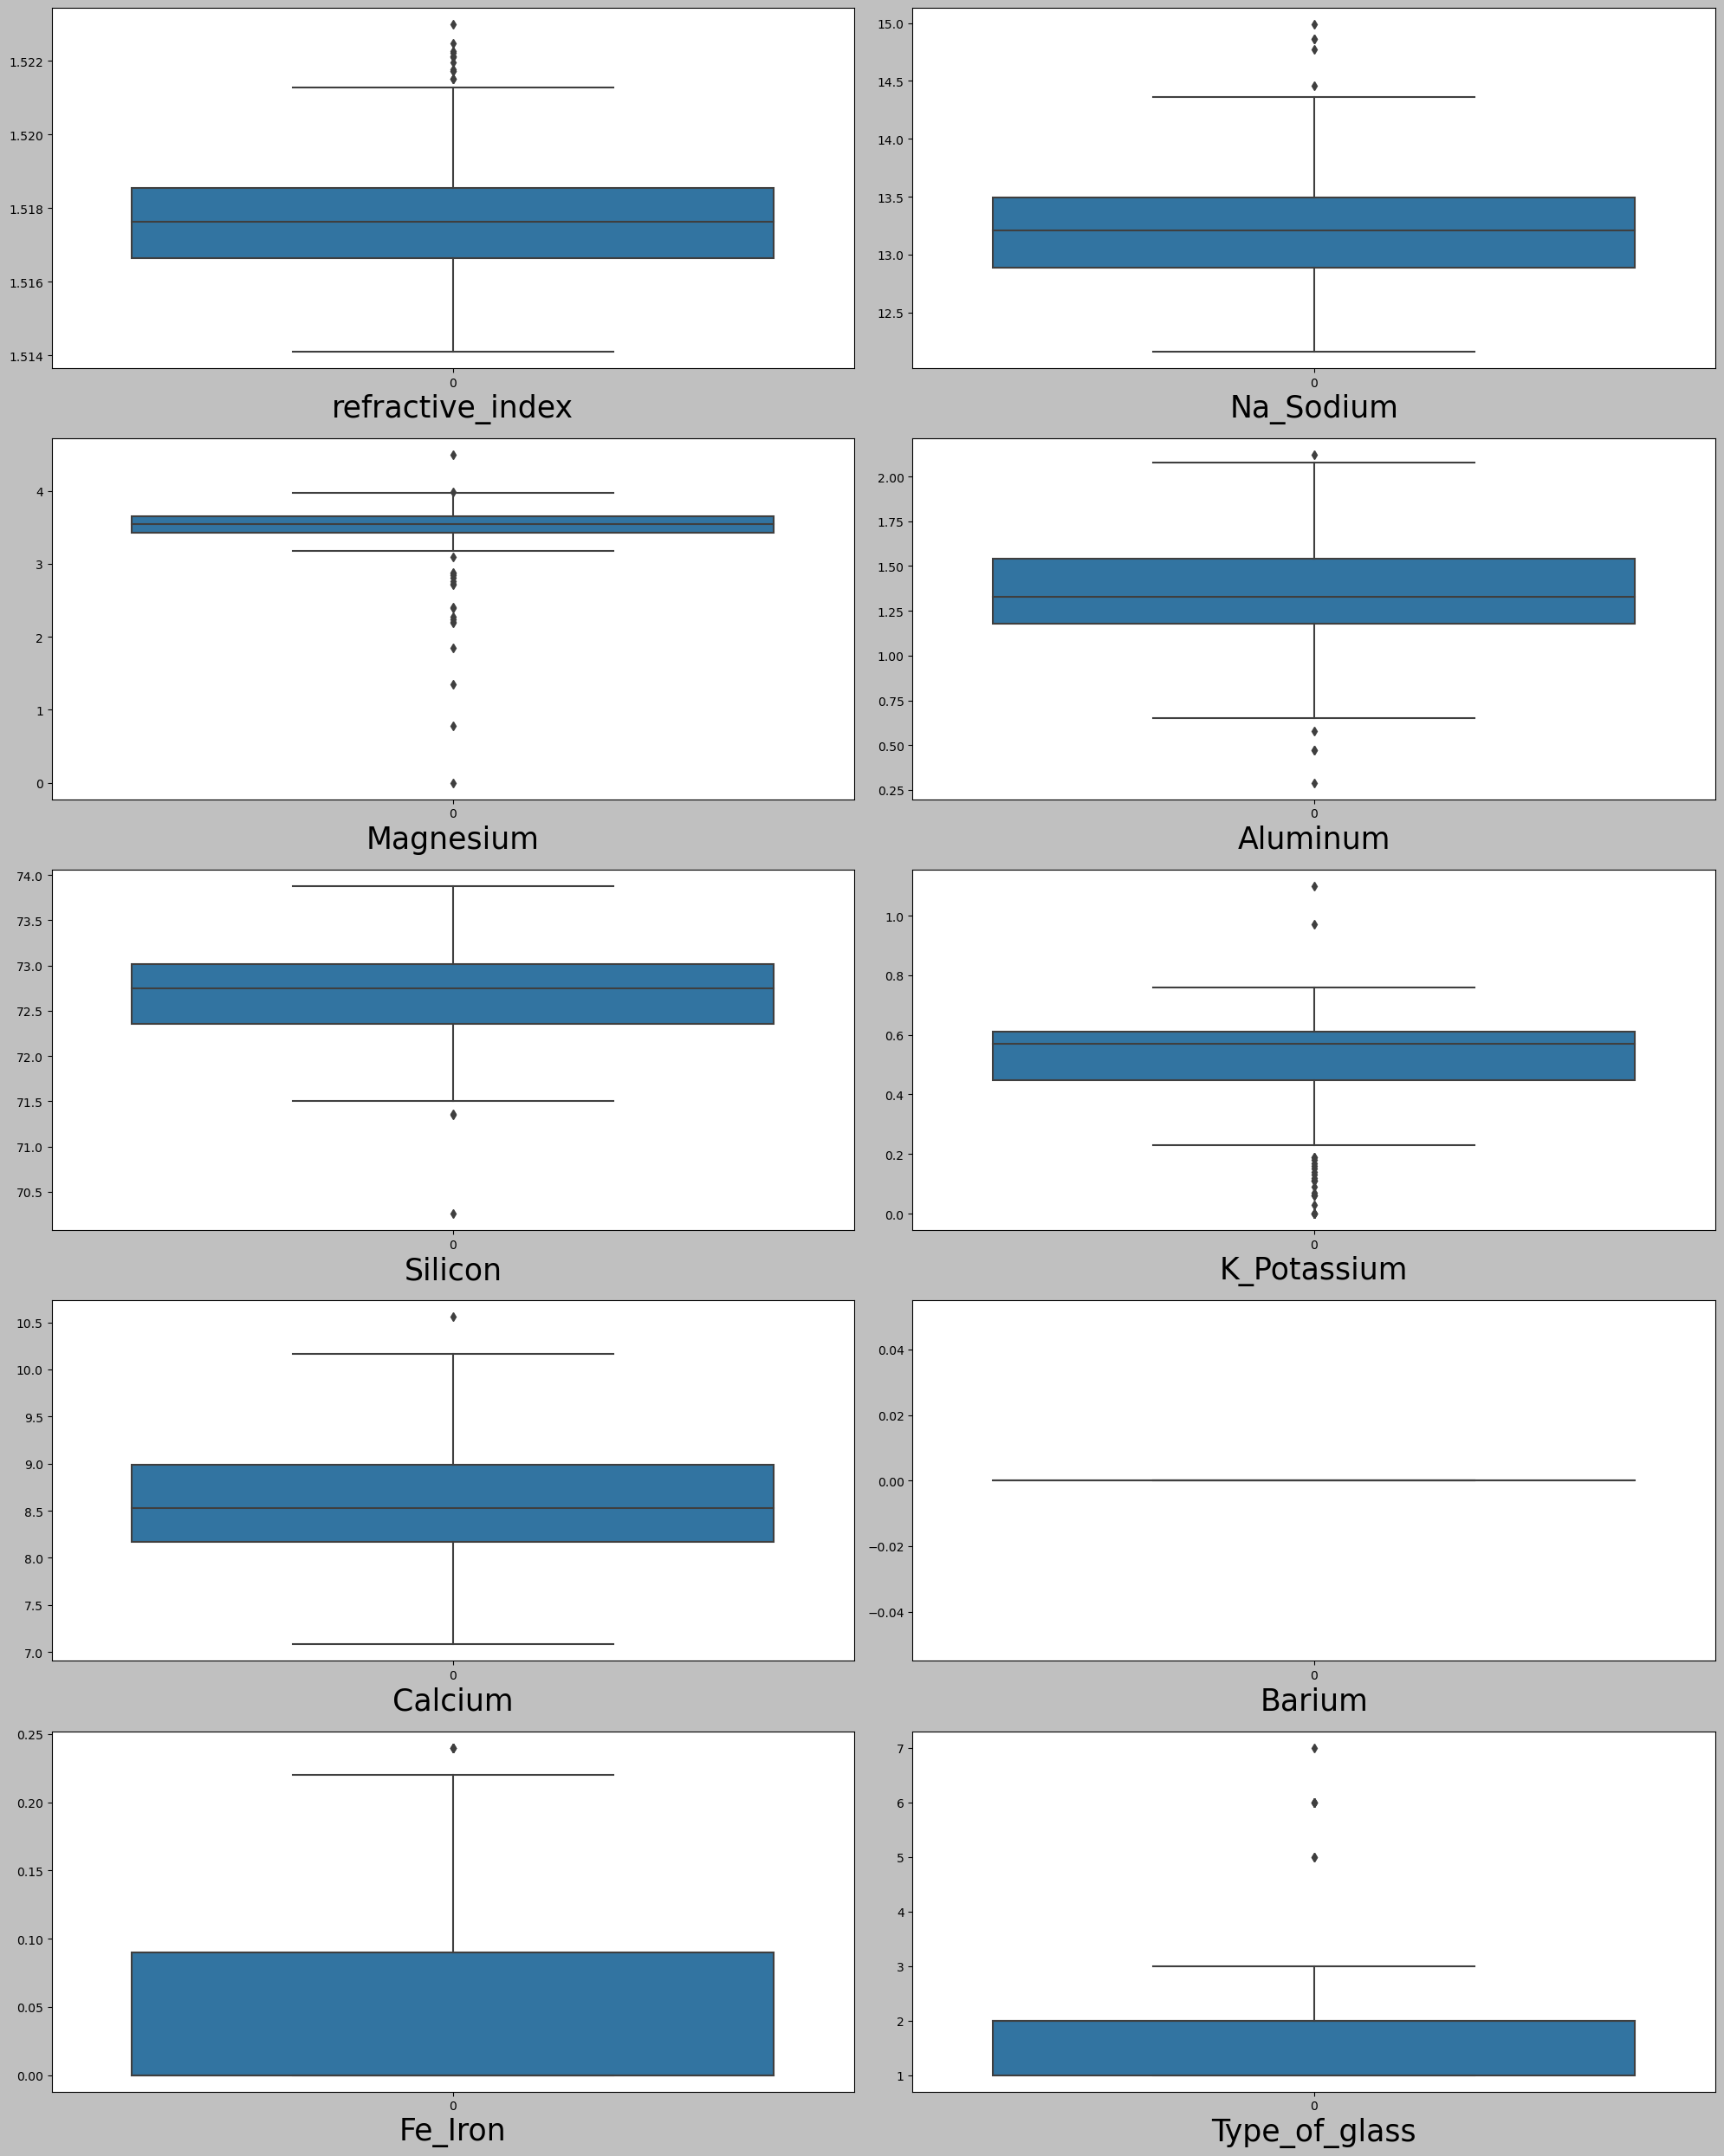

In [27]:
plt.figure(figsize=(20, 25),facecolor='silver')
graph = 1
for column in data_copy.columns:
    if graph <= 10:
        plt.subplot(5, 2, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=25)
    graph += 1


plt.tight_layout()
plt.show()

In [28]:
data_copy['Type_of_glass'].value_counts()

1    62
2    55
3    15
6     5
5     2
7     1
Name: Type_of_glass, dtype: int64

In [29]:
data_copy.skew()

refractive_index    1.004077
Na_Sodium           0.916309
Magnesium          -3.291494
Aluminum           -0.434601
Silicon            -0.911985
K_Potassium        -0.947547
Calcium             0.726643
Barium              0.000000
Fe_Iron             1.439687
Type_of_glass       2.230110
dtype: float64

#### IF we remove outliers then 35% data will be removed. so i will not remove outliers

In [30]:
data_copy1 = data.copy(deep=True)

In [31]:
data_copy1.skew()

refractive_index    1.625431
Na_Sodium           0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
K_Potassium         6.551648
Calcium             2.047054
Barium              3.416425
Fe_Iron             1.754327
Type_of_glass       1.114915
dtype: float64

#### Remove skewness 

In [32]:
data_copy1['Magnesium'] = data_copy1['Magnesium'] ** 2
data_copy1['Silicon'] = data_copy1['Silicon'] ** 2
## Square root
data_copy1['refractive_index'] = np.cbrt(data_copy1['refractive_index'])
data_copy1['Aluminum'] = np.cbrt(data_copy1['Aluminum'])
data_copy1['K_Potassium'] = np.cbrt(data_copy1['K_Potassium'])
data_copy1['Calcium'] = np.cbrt(data_copy1['Calcium'])
data_copy1['Barium'] = np.cbrt(data_copy1['Barium'])
data_copy1['Fe_Iron'] = np.cbrt(data_copy1['Fe_Iron'])

In [33]:
data_copy1.skew()

refractive_index    1.617049
Na_Sodium           0.454181
Magnesium          -0.824620
Aluminum           -0.204132
Silicon            -0.660131
K_Potassium        -0.591896
Calcium             1.407358
Barium              2.073007
Fe_Iron             0.894683
Type_of_glass       1.114915
dtype: float64

In [34]:
data_copy2 = data.copy(deep = True)

In [35]:
data_copy2['Magnesium'] = data_copy2['Magnesium'] ** 2
data_copy2['Silicon'] = data_copy2['Silicon'] ** 2

#For the Box-Cox transformation
data_copy2['refractive_index'] = np.log1p(data_copy2['refractive_index'])
data_copy2['Aluminum'] = np.log1p(data_copy2['Aluminum'])
data_copy2['K_Potassium'] = np.log1p(data_copy2['K_Potassium'])
data_copy2['Calcium'] = np.log1p(data_copy2['Calcium'])
data_copy2['Barium'] = np.log1p(data_copy2['Barium'])
data_copy2['Fe_Iron'] = np.log1p(data_copy2['Fe_Iron'])

In [36]:
data_copy2.skew()

refractive_index    1.617843
Na_Sodium           0.454181
Magnesium          -0.824620
Aluminum           -0.002668
Silicon            -0.660131
K_Potassium         1.977993
Calcium             1.168447
Barium              2.726670
Fe_Iron             1.586363
Type_of_glass       1.114915
dtype: float64

In [37]:
data_copy3 =data.copy(deep=True)

In [38]:
data_copy3['Magnesium'] = np.cbrt(data_copy3['Magnesium'])
data_copy3['Silicon'] = np.cbrt(data_copy3['Silicon'])

#For the log transformation:
data_copy3['refractive_index'] = np.log(data_copy3['refractive_index'])
data_copy3['Aluminum'] = np.log(data_copy3['Aluminum'])
data_copy3['K_Potassium'] = np.log(data_copy3['K_Potassium'])
data_copy3['Calcium'] = np.log(data_copy3['Calcium'])
data_copy3['Barium'] = np.log(data_copy3['Barium'])
data_copy3['Fe_Iron'] = np.log(data_copy3['Fe_Iron'])

In [39]:
data_copy3.skew()

refractive_index    1.612865
Na_Sodium           0.454181
Magnesium          -1.440196
Aluminum           -0.846483
Silicon            -0.776908
K_Potassium              NaN
Calcium             1.066363
Barium                   NaN
Fe_Iron                  NaN
Type_of_glass       1.114915
dtype: float64

#### Since there is a lot of outliers and skewness in this data set, so i will look at the correlation first 

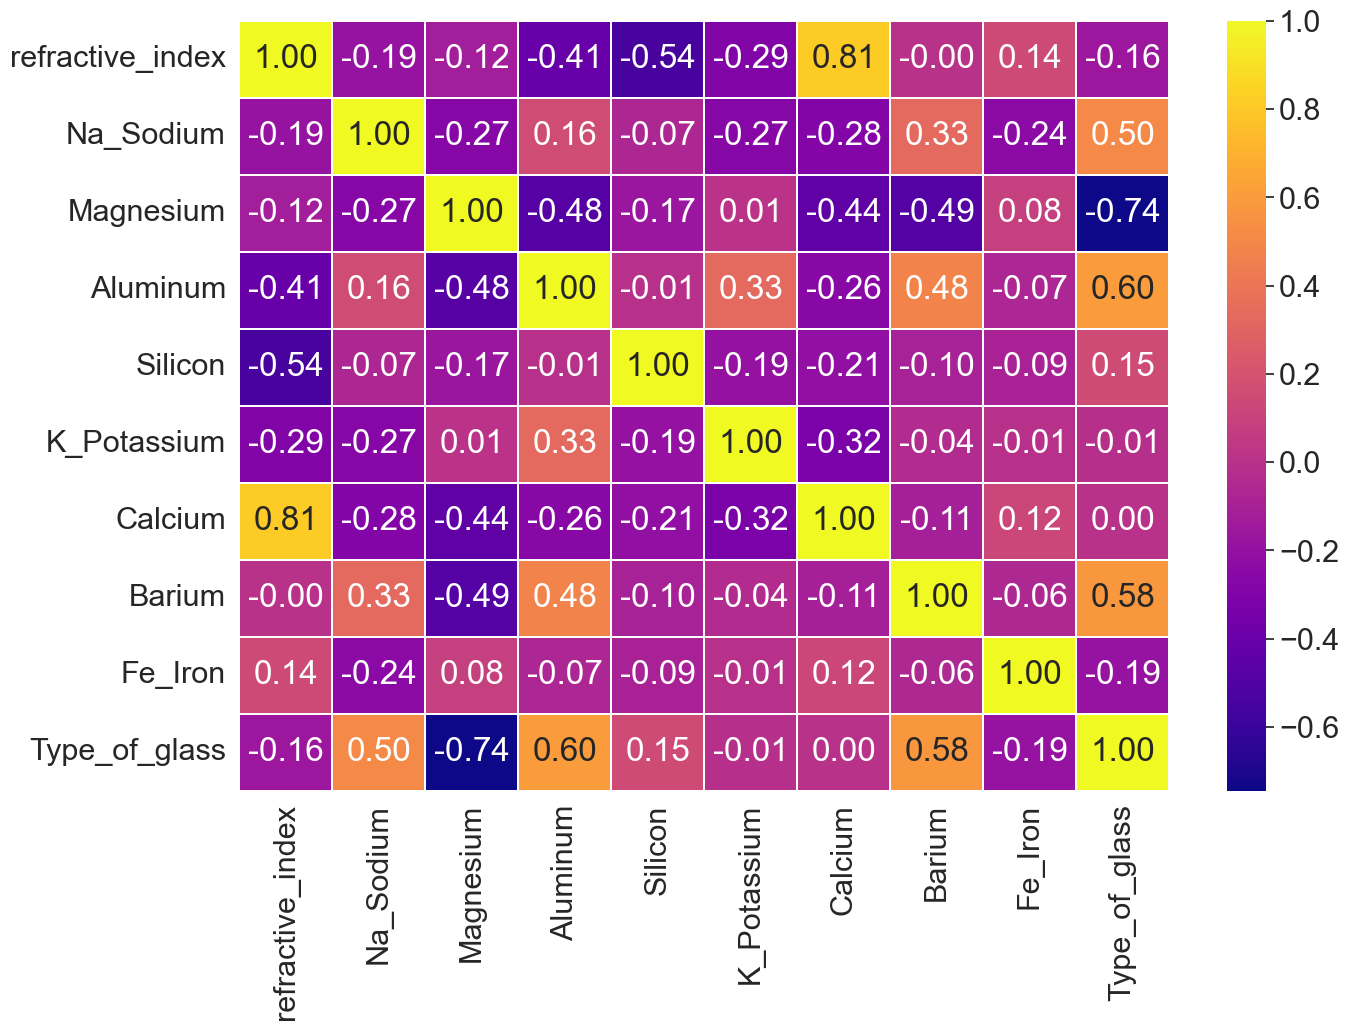

In [40]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 2)
sns.heatmap(data.corr(),linewidths=0.2,cmap='plasma', fmt=".2f", annot = True)
plt.show()

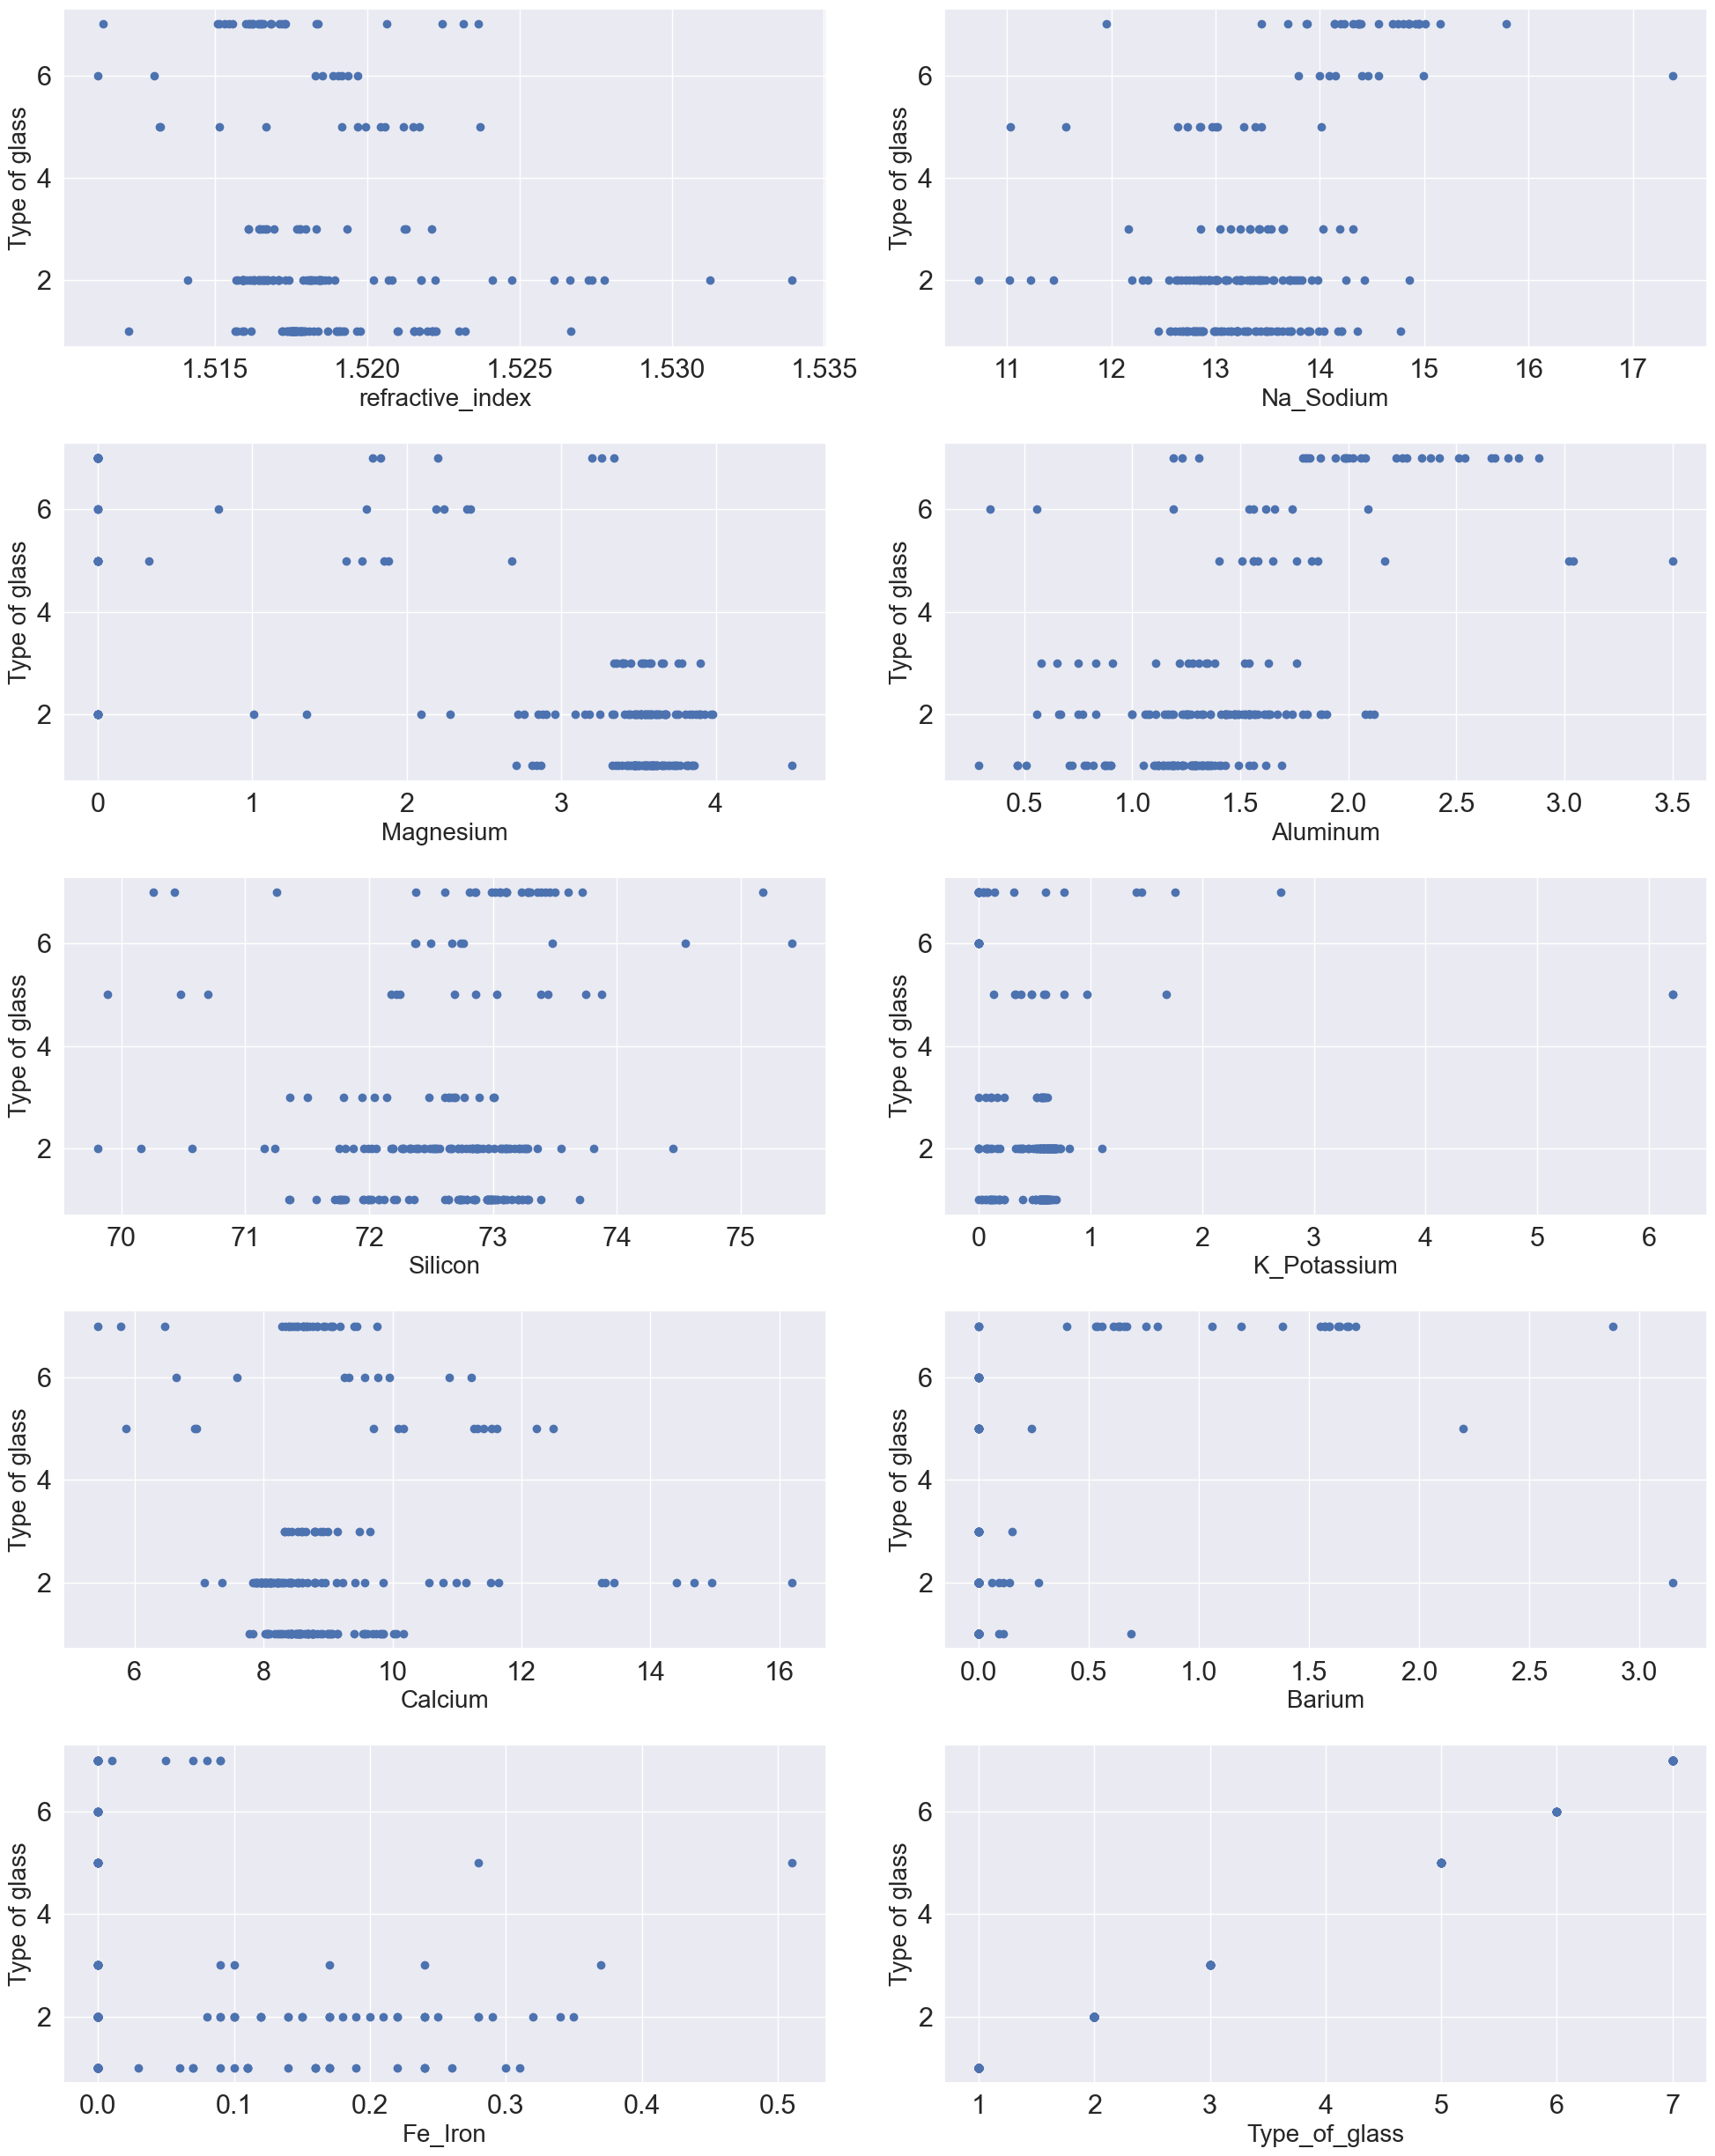

In [41]:
plt.figure(figsize=(20,25)) 
plotnumber= 1

for column in data:
    if plotnumber<=10:        #as there are 9 columns in the data
        ax = plt.subplot(5,2,plotnumber) 
        plt.scatter(data[column],data['Type_of_glass']) 
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Type of glass", fontsize = 20)


    plotnumber+=1
plt.tight_layout()    
plt.show()

#### Magnesium(Nagitive) , Na_Sodium ,  Aluminum ,  Barium have strong correlation with target variable
#### Fe_Iron and refractive_index very have less correlation with target variable
#### Calcium, Silicon and K_Potassium have no correlation with target variable so I will delete these columns.
#### Calcium and refractive_index have multicollinearity issue,  But  Calcium has no correlation with lable so I will delete it.

In [42]:
data.drop(columns=['Calcium','Silicon','K_Potassium'], inplace = True)
data.head()

,refractive_index,Na_Sodium,Magnesium,Aluminum,Barium,Fe_Iron,Type_of_glass
0,1.52101,13.64,4.49,1.10,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,0.0,0.0,1


#### refractive_index and Fe_Iron also not much important so I will delete  because refractive_index and Fe_Iron have so much outliers

In [43]:
data.drop(columns=['refractive_index','Fe_Iron'], inplace = True)
data.head()

,Na_Sodium,Magnesium,Aluminum,Barium,Type_of_glass
0,13.64,4.49,1.10,0.0,1
1,13.89,3.60,1.36,0.0,1
2,13.53,3.55,1.54,0.0,1
3,13.21,3.69,1.29,0.0,1
4,13.27,3.62,1.24,0.0,1


#### There is very strong negative correlation of the target variable with Magnesium. Therefore, I will not delete its outlier because if I delete its outlier, there relationship may be change.

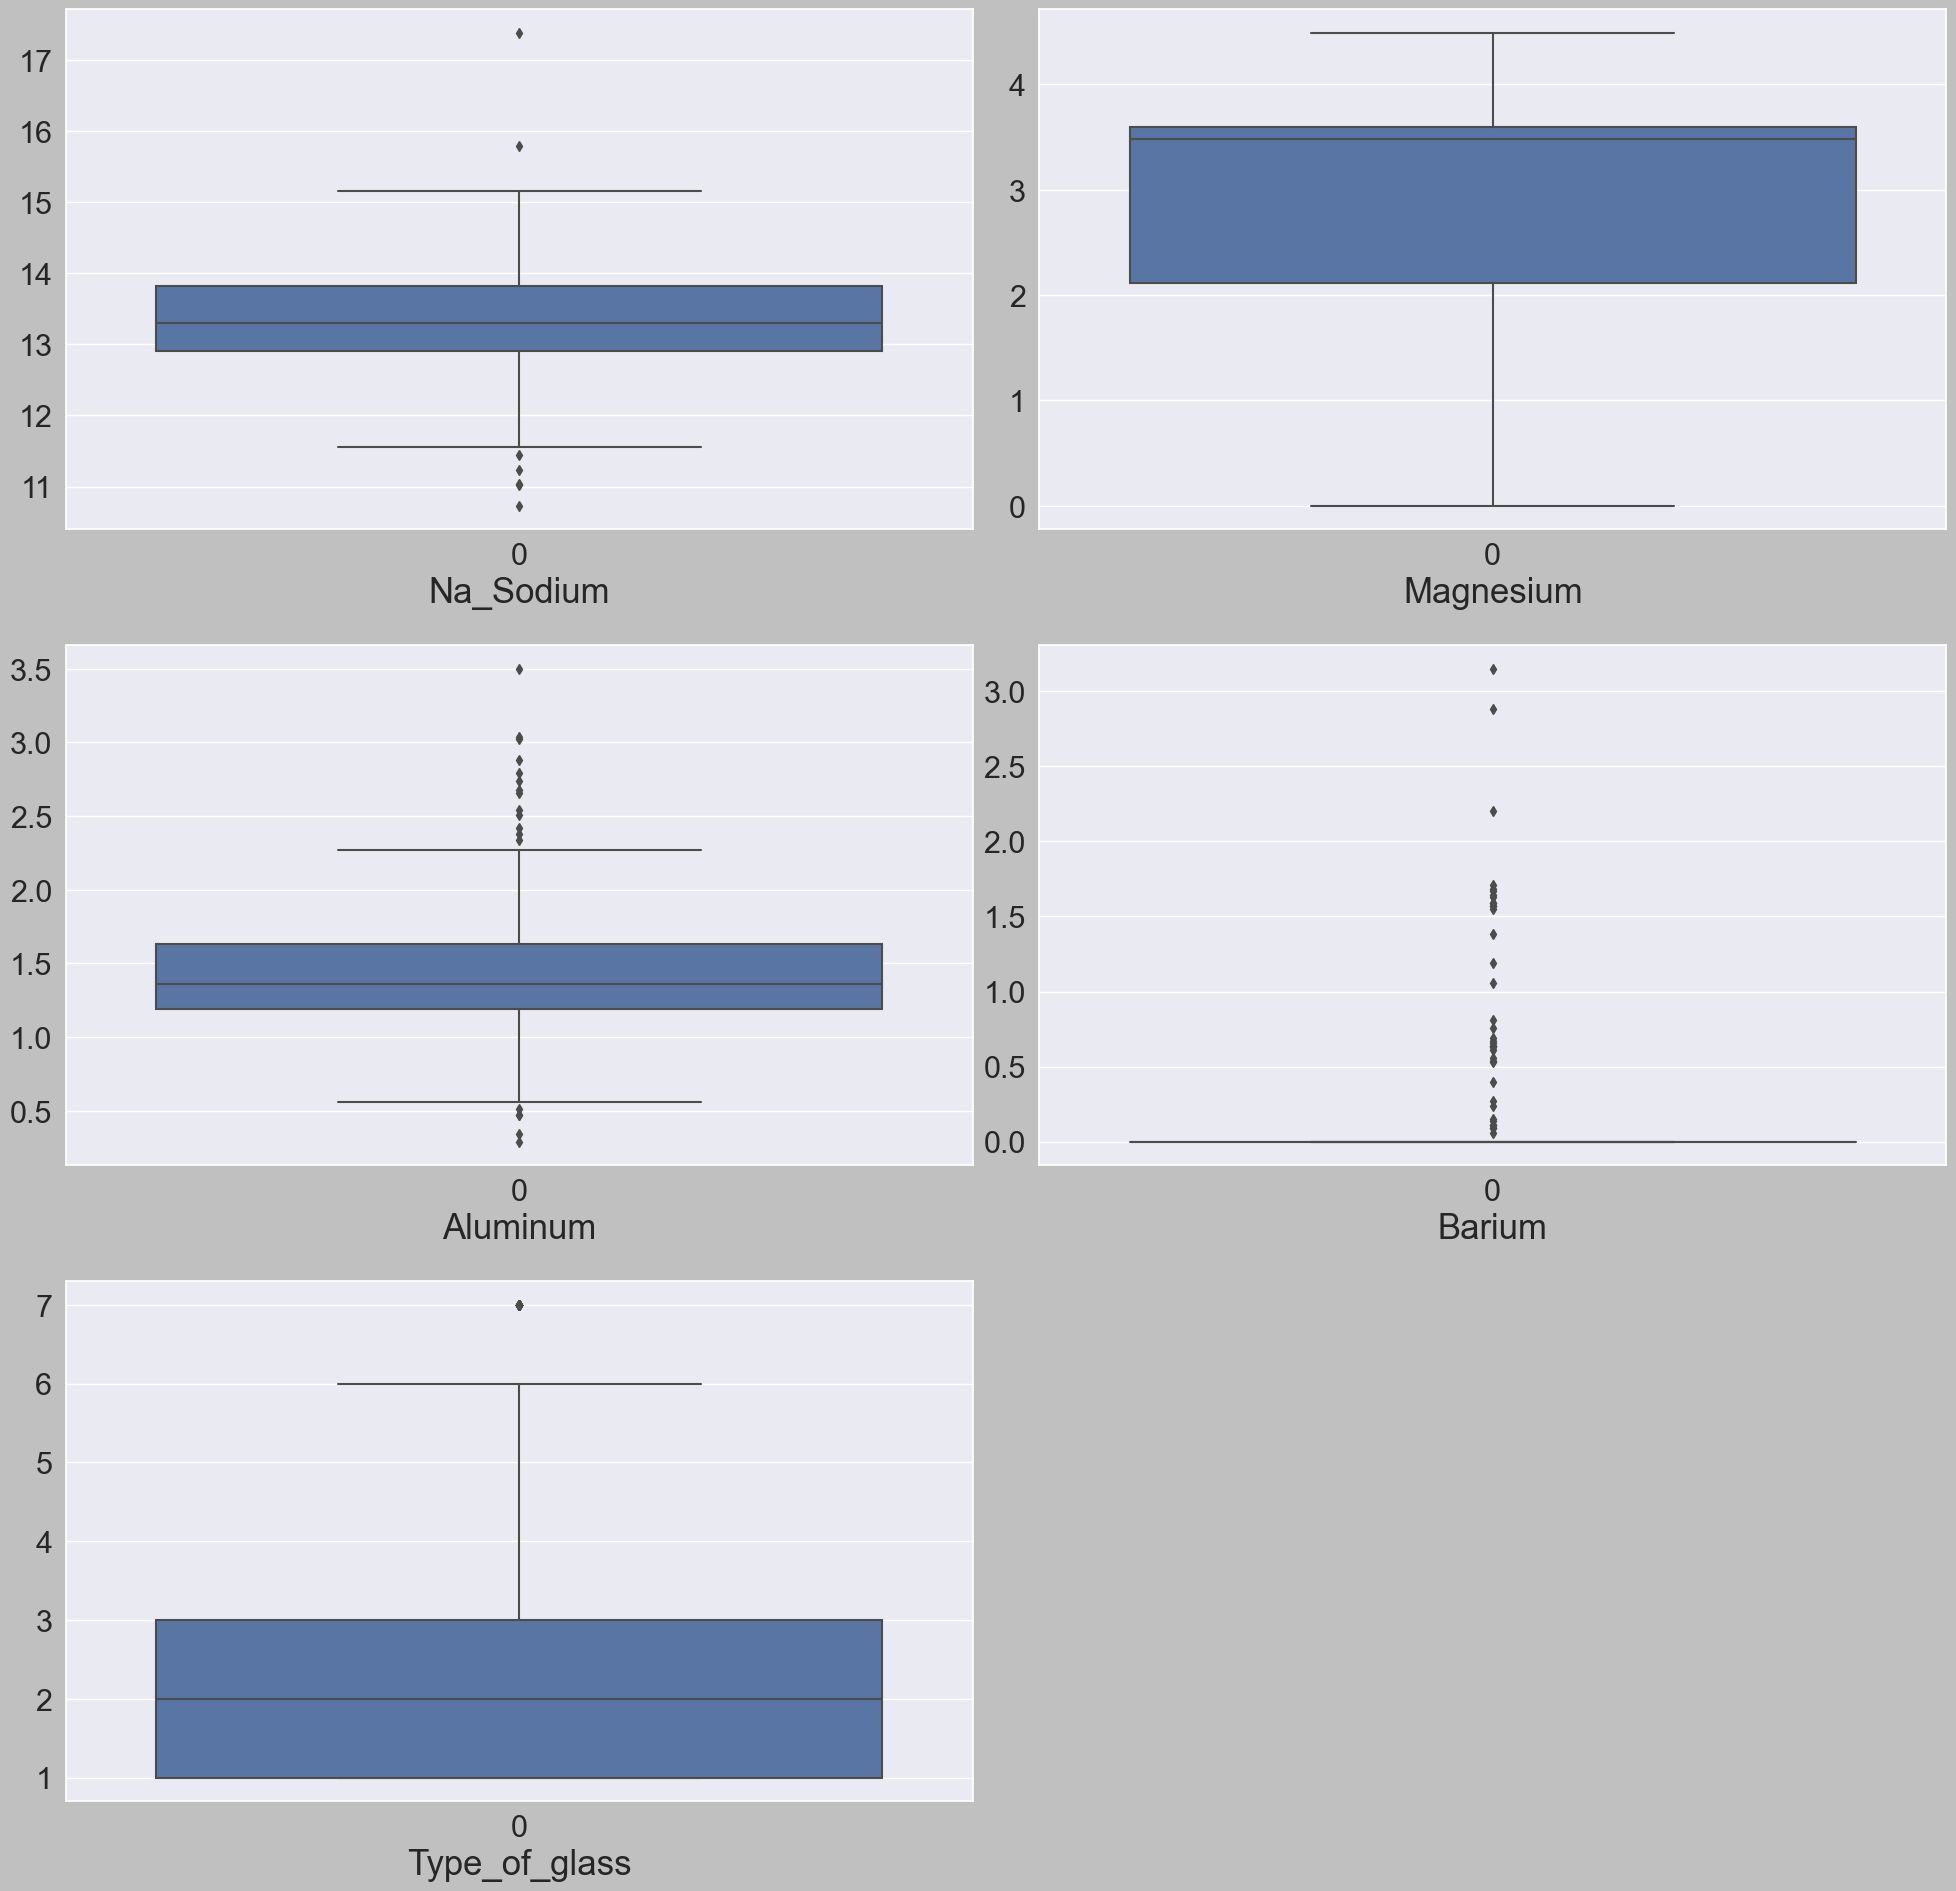

In [44]:
plt.figure(figsize=(20, 25),facecolor='silver')
graph = 1
for column in data.columns:
    if graph <= 8:
        plt.subplot(4, 2, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=25)
    graph += 1


plt.tight_layout()
plt.show()


In [45]:
#Find the IQR to identify outliers

# 1st quantile
q1 = data.quantile(0.25)

#3rd quantile 
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [46]:
b_high = (q3['Barium'] + (1.5* iqr['Barium']))
print(b_high)

b_index= np.where(data['Barium']> b_high) 
print (b_index)

data = data.drop(data.index[b_index])
print (data.shape ) 

data.reset_index()

0.0
(array([ 32,  36,  61,  99, 100, 106, 128, 141, 142, 161, 163, 174, 185,
       186, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213],
      dtype=int64),)
(176, 5)


,index,Na_Sodium,Magnesium,Aluminum,Barium,Type_of_glass
0,0,13.64,4.49,1.10,0.0,1
1,1,13.89,3.60,1.36,0.0,1
2,2,13.53,3.55,1.54,0.0,1
3,3,13.21,3.69,1.29,0.0,1
4,4,13.27,3.62,1.24,0.0,1
...,...,...,...,...,...,...
171,183,14.56,0.00,0.56,0.0,6
172,184,17.38,0.00,0.34,0.0,6
173,187,13.44,3.34,1.23,0.0,7
174,188,14.86,2.20,2.06,0.0,7


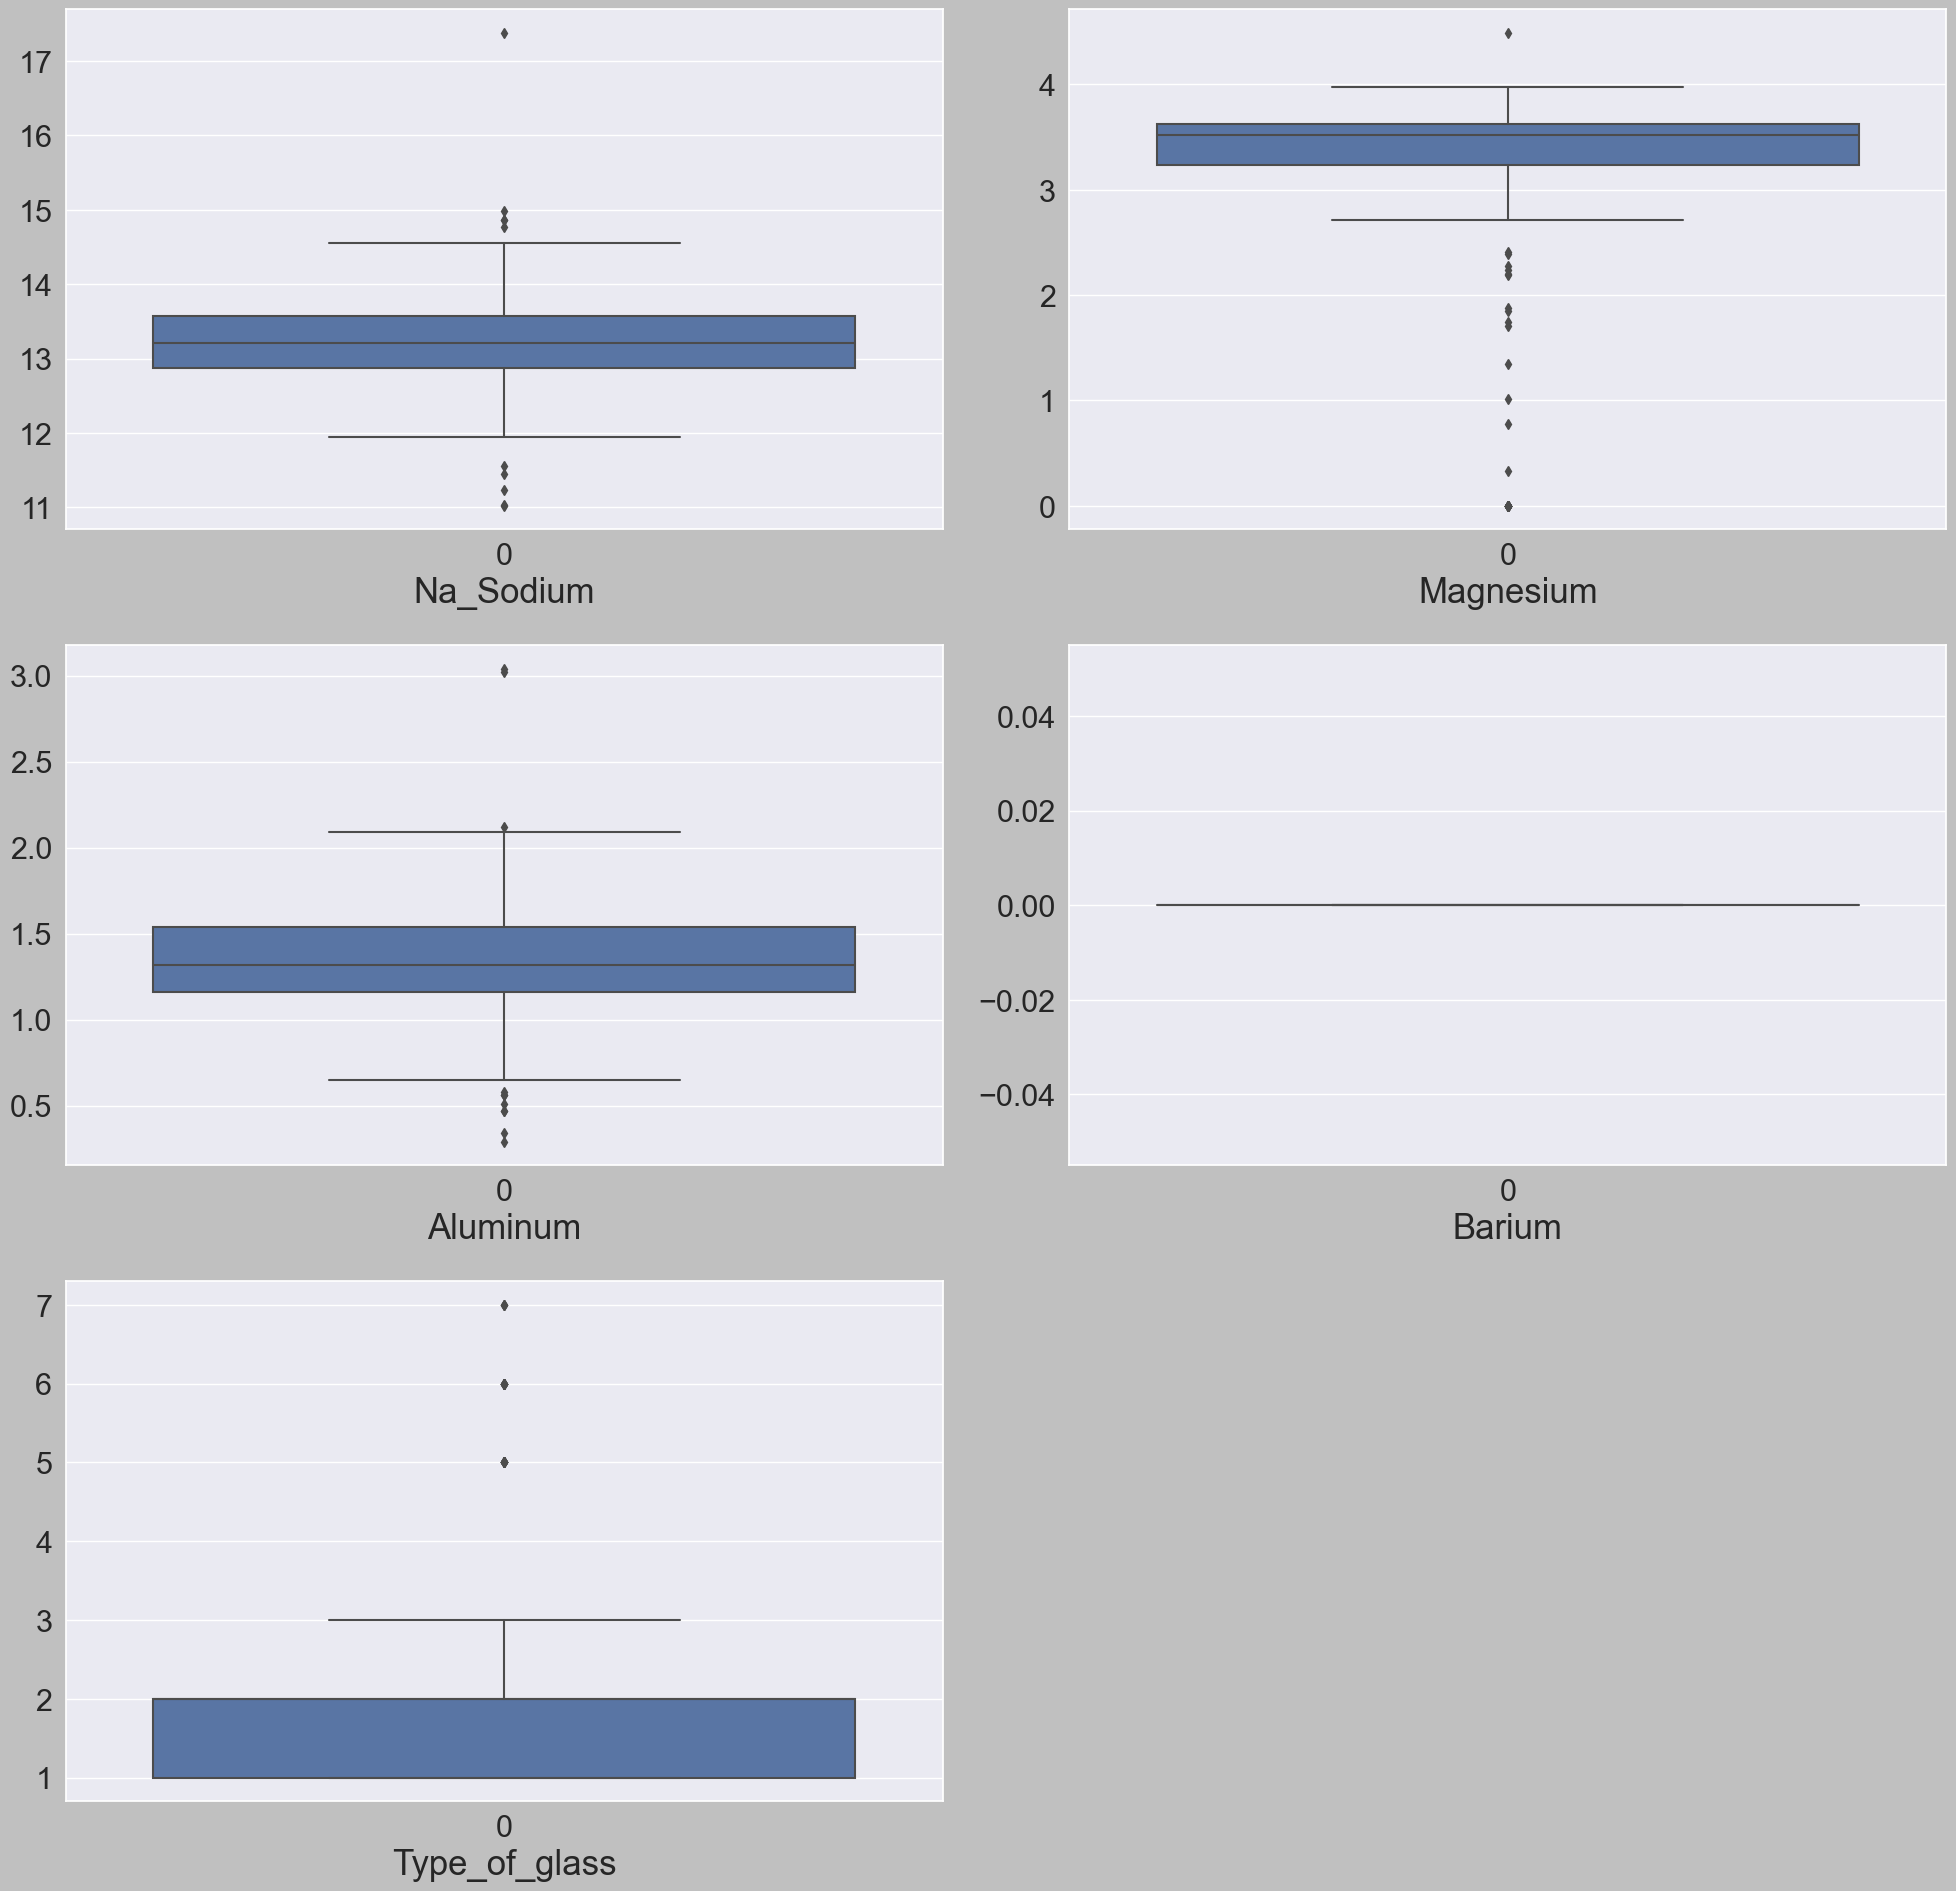

In [47]:
plt.figure(figsize=(20, 25),facecolor='silver')
graph = 1
for column in data.columns:
    if graph <= 8:
        plt.subplot(4, 2, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=25)
    graph += 1


plt.tight_layout()
plt.show()


#### cutting outliers of any features other then barium increases magnesium outlier, so I cut outlier only of barium

In [48]:
data.skew()

Na_Sodium        0.842626
Magnesium       -1.836394
Aluminum         0.559042
Barium           0.000000
Type_of_glass    1.660914
dtype: float64

In [49]:
data['Magnesium'] = data['Magnesium'] ** 2

## Square root
data['Na_Sodium'] = np.cbrt(data['Na_Sodium'])

In [50]:
data.skew()

Na_Sodium        0.447113
Magnesium       -1.336311
Aluminum         0.559042
Barium           0.000000
Type_of_glass    1.660914
dtype: float64

In [51]:
#### now data is clean

In [52]:
## Dividing dependent and independent variable
x = data_copy.drop('Type_of_glass',axis = 1)
y = data_copy['Type_of_glass']

In [53]:
## After dividing variable I scaled independent variable to normalizes the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


In [54]:
y.value_counts()

1    62
2    55
3    15
6     5
5     2
7     1
Name: Type_of_glass, dtype: int64

In [55]:
y.shape

(140,)

#### There is the class imbalance problem

##### I would not do too much over sampling as this may overfit the model

In [58]:
from imblearn.over_sampling import RandomOverSampler
d = {1:62,2:55,3:30,6:10,5:10,7:10}
ros = RandomOverSampler(sampling_strategy=d, random_state=400)
x_resampled, y_resampled = ros.fit_resample(x_scaled, y)


In [59]:
y_resampled.value_counts()

1    62
2    55
3    30
5    10
6    10
7    10
Name: Type_of_glass, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.20, random_state= 100)

In [63]:
# Write a function and call as many as time to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test, pred,digits=2))

### DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [65]:
# Training and initiation name to modal
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True)        #This is for training score 
metric_score(clf,x_train,x_test,y_train,y_test, train=False)       #This is fore testing score


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  83.33%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.80      0.80      0.80        10
           3       0.78      0.88      0.82         8
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.83        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.83      0.83      0.83        36



### RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier 

In [68]:
# Training and initiation name to modal
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
# Call the function and pass dataset to check train and test score
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)        #This is for training score 
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)       #This is fore testing score


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  86.11%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           1       0.70      0.78      0.74         9
           2       0.80      0.80      0.80        10
           3       1.00      0.88      0.93         8
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.86        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.87      0.86      0.86        36



### Cross Validation

#### we will see if model is overfit or not.

In [70]:
from sklearn.model_selection import cross_val_score

#### DecisionTreeClassifier

In [75]:
cross_val_scores = cross_val_score(clf, x_scaled, y, cv=20, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.7499999999999999


In [76]:
cross_val_scores = cross_val_score(clf, x_scaled, y, cv=25, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.6893333333333335


##### The accuracy score of DecisionTree model and cross validation score is close to each other, so this model is not overfit

#### RandomForestClassifier

In [73]:
cross_val_scores = cross_val_score(rfc, x_scaled, y, cv=20, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.7571428571428571


In [74]:
cross_val_scores = cross_val_score(rfc, x_scaled, y, cv=25, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.7800000000000001


#### Because i find the scores of decision tree to be more accurate and there is no overfitting in it , So I will select the decision tree model

### Hyperparameter tuning:

#### I will use Hyperparameter tuning to further improve the score.

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_g    = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15,20,25,30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
             }


In [79]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_g, cv=5, scoring='accuracy')


In [80]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [81]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [82]:
grid_search.best_score_

0.7938423645320197

#### It is better score

### Tuen the DecisionTree

In [83]:
dtc = DecisionTreeClassifier(criterion= 'gini',max_depth=30,min_samples_leaf=1,
                             min_samples_split=2)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=30)

In [84]:
# Call the function and pass dataset to check train and test score
metric_score(dtc,x_train,x_test,y_train,y_test, train=True)       
metric_score(dtc,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  83.33%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.80      0.80      0.80        10
           3       0.78      0.88      0.82         8
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.83        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.83      0.83      0.83        36



#### both are same 

In [86]:
import pickle

In [87]:
pickle.dump(dtc,open('Glass_qua_p','wb'))